In [1]:
import transformers
from transformers import BertForMaskedLM, BertTokenizer, pipeline
import torch
import re
import math
import numpy as np
import matplotlib.pyplot as plt
import json, pickle
from collections import OrderedDict
import os
from tqdm import tqdm

In [2]:
def get_protbert_embed(data):
    embed = dict()
    
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    tokenizer = BertTokenizer.from_pretrained('prot_bert_bfd', do_lower_case=False )
    model = BertForMaskedLM.from_pretrained("prot_bert_bfd").to(device)
    
    for id, seq in tqdm(data.items(), ncols=0):
        seq1 = " ".join(list(re.sub(r"[UZOB]", "X", seq)))
        
        ids = tokenizer(seq1, return_tensors='pt')
        input_ids = torch.tensor(ids['input_ids']).to(device)
        attention_mask = torch.tensor(ids['attention_mask']).to(device)
        
        with torch.no_grad():
            output = model(input_ids=input_ids, attention_mask=attention_mask)
            
        output1 = output[0][0][1: -1]
        assert len(seq) == len(output1)
        
        embed[id] = output1.cpu()
        
    return embed

In [32]:
def padding(data, maxlen):
    data_new = dict()
    
    for id, vec in tqdm(data.items(), ncols=0):
        vec_new = torch.zeros((maxlen, vec.shape[1]), dtype=torch.float32)
        if vec.shape[0] < maxlen:
            vec_new[:vec.shape[0]] = vec[:]
        else:
            vec_new[:] = vec[:maxlen]
            
        data_new[id] = vec_new
        
    return data_new

In [29]:
def len_static(data):
    ls = []
    for p in data.values():
        ls.append(len(p))
        
    plt.figure(figsize=(6,4))
    plt.hist(ls, bins=20, range=[0,2000], cumulative=False, rwidth=1, color='c', edgecolor='k')
    plt.xlabel("length of protein sequences")
    plt.ylabel("number of proteins")
    plt.tick_params(direction="in")
    plt.show()
    
    print("80% of protein-length: ", np.percentile(ls, 80))
    print("85% of protein-length: ", np.percentile(ls, 85))
    print("90% of protein-length: ", np.percentile(ls, 90))

In [20]:
Dpath = "/root/autodl-tmp/MSF-DTA/data/davis/"
Dproteins = json.load(open(Dpath + "proteins.txt"), object_pairs_hook=OrderedDict)
print(len(Dproteins))

442


In [55]:
Dembed = get_protbert_embed(Dproteins)
list(Dembed.values())[0].shape

Some weights of the model checkpoint at prot_bert_bfd were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
  0% 0/442 [00:00<?, ?it/s]/tmp/ipykernel_912/1158121745.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ids = torch.tensor(ids['input_ids']).to(device)
/

torch.Size([961, 30])

In [56]:
list(Dembed.values())[0][:1]

tensor([[-23.0457, -23.6379, -22.7217, -28.8316, -23.0831,   0.7845,   0.2241,
          -0.1381,  -0.0830,  -0.9259,   0.0826,  -0.3770,  -0.5627,  -0.1435,
          -1.2376,  -0.7011,  -0.2403,  -1.0371,  -0.1409,   0.2140,  -1.3304,
           7.8041,  -1.3169,  -1.6533,  -1.9126,  -4.4924, -24.3929, -23.1126,
         -24.2497, -24.6276]])

In [57]:
with open("/root/autodl-tmp/Davis/Data/prot_seq_pb.pkl", 'wb') as f:
    pickle.dump(Dembed, f)

In [58]:
Kpath = "/root/autodl-tmp/MSF-DTA/data/kiba/"
Kproteins = json.load(open(Kpath + "proteins.txt"), object_pairs_hook=OrderedDict)
print(len(Kproteins))

229


In [59]:
Kembed = get_protbert_embed(Kproteins)
list(Kembed.values())[0].shape

Some weights of the model checkpoint at prot_bert_bfd were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
  0% 0/229 [00:00<?, ?it/s]/tmp/ipykernel_912/1158121745.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ids = torch.tensor(ids['input_ids']).to(device)
/

torch.Size([431, 30])

In [60]:
list(Kembed.values())[0][:1], len(Kembed)

(tensor([[-2.2707e+01, -2.3514e+01, -2.2063e+01, -2.9962e+01, -2.3004e+01,
           9.3059e-01,  3.4273e-01, -3.4252e-01,  3.3305e-01,  1.5587e-01,
           5.9936e-01, -2.8438e-02,  7.4587e-01,  1.4394e-01, -4.6985e-01,
           9.1295e-02,  1.1490e-01, -3.0942e-01,  3.1782e-01,  1.3748e-01,
          -1.1523e+00,  5.5826e+00, -1.0576e+00, -1.1791e+00, -1.1001e+00,
          -5.5739e+00, -2.3836e+01, -2.2678e+01, -2.3725e+01, -2.3921e+01]]),
 229)

In [61]:
with open("/root/autodl-tmp/KIBA/Data/prot_seq_pb.pkl", 'wb') as f:
    pickle.dump(Kembed, f)

In [3]:
Hpath = "/root/autodl-tmp/Human/prot_seq_raw.pkl"
with open(Hpath, 'rb') as f:
    Hprot = pickle.load(f)
print(len(Hprot))

835


In [4]:
Hembed = get_protbert_embed(Hprot)
list(Hembed.values())[0].shape

/root/miniconda3/lib/python3.8/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of the model checkpoint at prot_bert_bfd were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a B

torch.Size([432, 30])

In [6]:
list(Hembed.values())[0][:1], len(Hembed)

(tensor([[-23.2703, -23.2235, -21.7934, -29.0156, -22.5568,   0.2906,  -0.1673,
           -0.6463,   0.2906,  -0.7277,   0.1577,  -1.0553,   0.0311,  -0.3571,
           -0.6856,  -0.2059,  -1.0176,   0.2099,  -0.6271,  -1.5551,  -2.0911,
           10.1277,  -2.0527,  -2.4783,  -3.4610,  -4.5400, -24.6398, -22.4819,
          -24.1878, -23.8809]]),
 835)

In [35]:
with open("/root/autodl-tmp/Human/prot_seq_pb.pkl", 'wb') as f:
    pickle.dump(Hembed, f)

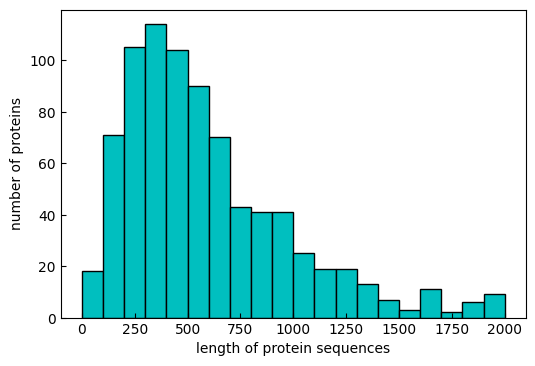

80% of protein-length:  924.2
85% of protein-length:  1046.6
90% of protein-length:  1263.8000000000004


In [30]:
len_static(Hprot)

In [33]:
Hembed1 = padding(Hembed, maxlen=1000)
list(Hembed1.values())[0].shape

100% 835/835 [00:00<00:00, 11433.40it/s]


torch.Size([1000, 30])

In [34]:
with open("/root/autodl-tmp/Human/prot_seq_pb1.pkl", 'wb') as f:
    pickle.dump(Hembed1, f)

In [ ]:
task = "BIOSNAP"
with open(f"{task}/prot_seq_raw.pkl", 'rb') as f:
    prot = pickle.load(f)
print(len(prot))

In [ ]:
embed = get_protbert_embed(prot)
list(embed.values())[0].shape

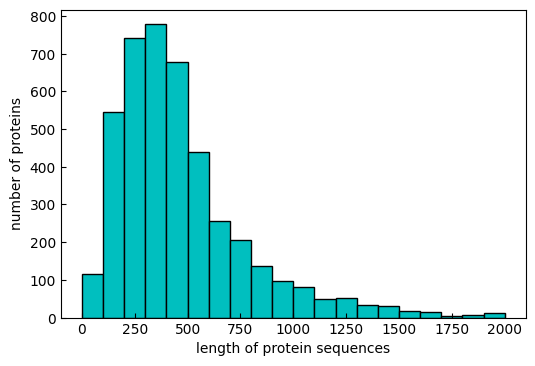

80% of protein-length:  648.4000000000001
85% of protein-length:  739.0
90% of protein-length:  875.0


In [40]:
len_static(Bprot)

In [ ]:
embed1 = padding(embed, maxlen=750)
list(embed1.values())[0].shape

In [42]:
with open(f"{task}/prot_seq.pkl", 'wb') as f:
    pickle.dump(embed1, f)